# Problem Statement: Next Word Prediction

## Importing The Libraries

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam

import pickle
import numpy as np
import os

## Reading the Text File

Link to the original dataset: http://www.gutenberg.org/cache/epub/5200/pg5200.txt

In [2]:
file = open('word prediction.txt', 'r', encoding = 'utf8')

lines = []

for i in file:
    lines.append(i)


print("The First Line: ", lines[0])

print("The Last Line: ", lines[-1])

The First Line:  One morning, when Gregor Samsa woke from troubled dreams, he found

The Last Line:  first to get up and stretch out her young body.


In [3]:
lines

['One morning, when Gregor Samsa woke from troubled dreams, he found\n',
 'himself transformed in his bed into a horrible vermin.  He lay on\n',
 'his armour-like back, and if he lifted his head a little he could\n',
 'see his brown belly, slightly domed and divided by arches into stiff\n',
 'sections.  The bedding was hardly able to cover it and seemed ready\n',
 'to slide off any moment.  His many legs, pitifully thin compared\n',
 'with the size of the rest of him, waved about helplessly as he\n',
 'looked.\n',
 '\n',
 '"What\'s happened to me?" he thought.  It wasn\'t a dream.  His room,\n',
 'a proper human room although a little too small, lay peacefully\n',
 'between its four familiar walls.  A collection of textile samples\n',
 'lay spread out on the table - Samsa was a travelling salesman - and\n',
 'above it there hung a picture that he had recently cut out of an\n',
 'illustrated magazine and housed in a nice, gilded frame.  It showed\n',
 'a lady fitted out with a fur hat a

## Data Cleaning

### Replacing \n, \r and utf characters

In [4]:
data = ""

for i in lines:
    data = ' '. join(lines)

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.'

### Remove punctuations

In [5]:
## We use the string class that already has knowledge of punctuations

import string

In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space

data = data.translate(translator)

data[:500]

'One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin   He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections   The bedding was hardly able to cover it and seemed ready to slide off any moment   His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked    What s happened to me   he'

In [8]:
data

'One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin   He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections   The bedding was hardly able to cover it and seemed ready to slide off any moment   His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked    What s happened to me   he thought   It wasn t a dream   His room  a proper human room although a little too small  lay peacefully between its four familiar walls   A collection of textile samples lay spread out on the table   Samsa was a travelling salesman   and above it there hung a picture that he had recently cut out of an illustrated magazine and housed in a nice  gilded frame   It showed a lady fitted out with a fur hat and fur boa who sat upright  raising a heavy fur muff that covered the whole of her lower arm 

### Tokenization - To create array of words

In [9]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))


In [10]:
tokenizer.word_index.items()

dict_items([('the', 1), ('to', 2), ('and', 3), ('he', 4), ('his', 5), ('of', 6), ('was', 7), ('it', 8), ('had', 9), ('in', 10), ('that', 11), ('gregor', 12), ('a', 13), ('as', 14), ('she', 15), ('with', 16), ('s', 17), ('him', 18), ('her', 19), ('would', 20), ('not', 21), ('but', 22), ('at', 23), ('for', 24), ('they', 25), ('on', 26), ('all', 27), ('room', 28), ('from', 29), ('could', 30), ('be', 31), ('out', 32), ('have', 33), ('there', 34), ('if', 35), ('father', 36), ('been', 37), ('sister', 38), ('so', 39), ('this', 40), ('i', 41), ('now', 42), ('mother', 43), ('himself', 44), ('door', 45), ('then', 46), ('back', 47), ('up', 48), ('even', 49), ('into', 50), ('what', 51), ('no', 52), ('did', 53), ('one', 54), ('more', 55), ('their', 56), ('when', 57), ('were', 58), ('about', 59), ('them', 60), ('t', 61), ('you', 62), ('way', 63), ('only', 64), ('time', 65), ('by', 66), ('than', 67), ('just', 68), ('said', 69), ('little', 70), ('any', 71), ('other', 72), ('do', 73), ('get', 74), ('st

### Sequencing

In [11]:
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[54, 142, 57, 12, 95, 920, 29, 1295, 921, 4]

In [12]:
print(data.split(' ')[:10])
print(sequence_data[:10])

['One', 'morning', '', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams']
[54, 142, 57, 12, 95, 920, 29, 1295, 921, 4]


### Checking Vocab Size

In [13]:
vocab_size = len(tokenizer.word_index) + 1

print(vocab_size)

2573


## Data Preprocessing

In [14]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))

sequences = np.array(sequences)

sequences[:10]


#[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]

The Length of sequences are:  22374


array([[  54,  142],
       [ 142,   57],
       [  57,   12],
       [  12,   95],
       [  95,  920],
       [ 920,   29],
       [  29, 1295],
       [1295,  921],
       [ 921,    4],
       [   4,  242]])

In [15]:
## Splitting the above data into features and target

X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])

X = np.array(X)
y = np.array(y)

In [16]:
display(X,
       y)

array([ 54, 142,  57, ...,  32,  19, 915])

array([142,  57,  12, ...,  19, 915, 135])

In [17]:
print("The Dataset is: ", X[:10])

print("The Responses are: ", y[:10])

The Dataset is:  [  54  142   57   12   95  920   29 1295  921    4]
The Responses are:  [ 142   57   12   95  920   29 1295  921    4  242]


In [18]:
## Converting y variable to vector space

from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=vocab_size)

y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
y.shape

(22374, 2573)

## Model Building - Unigram Model

This assumption that the probability of a word depends only on the previous word is also known as Markov assumption.

In [20]:
model = Sequential()

model.add(Embedding(vocab_size, 10, input_length=1))

model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))

model.add(Dense(1000, activation="relu"))

model.add(Dense(vocab_size, activation="softmax"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             25730     
_________________________________________________________________
lstm (LSTM)                  (None, 1, 1000)           4044000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense (Dense)                (None, 1000)              1001000   
_________________________________________________________________
dense_1 (Dense)              (None, 2573)              2575573   
Total params: 15,650,303
Trainable params: 15,650,303
Non-trainable params: 0
_________________________________________________________________


## Plotting the Model

In [22]:
import keras
import keras.utils
from keras.utils.vis_utils import plot_model

In [23]:
# !pip install pydot
# !pip install pydotplus
# !pip install graphviz

In [24]:
## import os

## os.environ["Path"]= "C:\\Program Files\\Graphviz\\bin"

In [25]:
## os.getenv("Path")

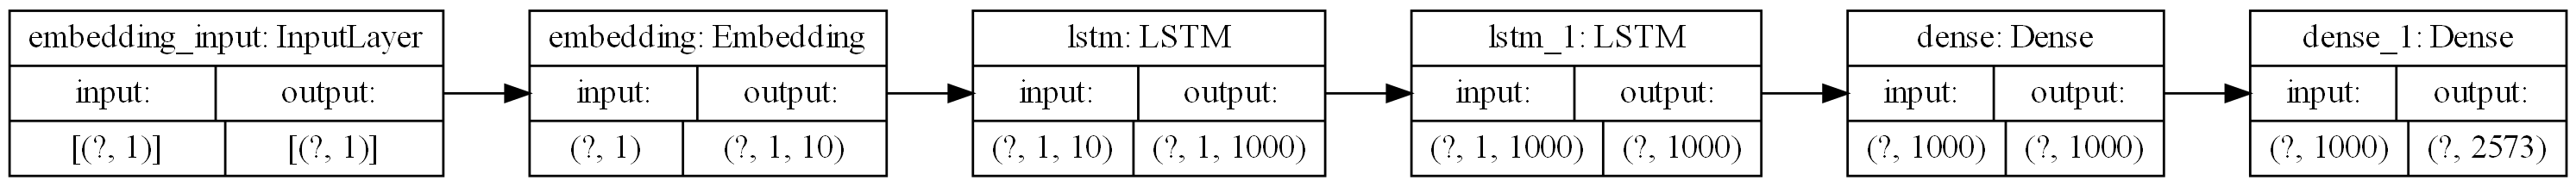

In [26]:
keras.utils.plot_model(model, to_file='NN_model.png', show_layer_names=True, show_shapes=True, expand_nested=True
, rankdir='LR', dpi = 200)

##rankdir='TB'

## Callbacks

### 1. Creating Checkpoint

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

### 2. Learning Rate On Plateau

In [28]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

### 3. TensorBoard

In [29]:
from tensorflow.keras.callbacks import TensorBoard

logdir='logsnextword'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

## Compiling the model

In [30]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001))

## Fitting the model

In [31]:
model.fit(X, y, epochs=20, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/20
  1/350 [..............................] - ETA: 0s - loss: 7.8528WARNING:tensorflow:From C:\Users\aditi\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
350/350 [==============================] - ETA: 0s - loss: 6.2130
Epoch 00001: loss improved from inf to 6.21299, saving model to nextword1.h5
350/350 [==============================] - 71s 204ms/step - loss: 6.2130
Epoch 2/20
350/350 [==============================] - ETA: 0s - loss: 5.7784
Epoch 00002: loss improved from 6.21299 to 5.77842, saving model to nextword1.h5
350/350 [==============================] - 70s 201ms/step - loss: 5.7784
Epoch 3/20
350/350 [==============================] - ETA: 0s - loss: 5.4998
Epoch 00003: loss improved from 5.77842 to 5.49985, saving model to nextword1.h5
350/350 [============================

### The model is now ready and the predictions will be made in the next notebook by loading the pickle file which was cretaed for tokenizer and h5 file for the model